# Desafío - Expansiones basales - JUAN OYARCE G

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


### Descripción

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.
* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.
* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [39]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pygam import LinearGAM
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from IPython.display import display, Markdown
import missingno as msngo
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf

import factor_analyzer as factor
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importación de la base de datos
df = pd.read_csv("compresive_strength_concrete.csv")
df.head()



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
# Se cambian los nombres de las columnas
df = pd.read_csv('compresive_strength_concrete.csv', header=0, names=['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength'])
df.head()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Ejercicio 2: Descripción
* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals) .
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc .
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


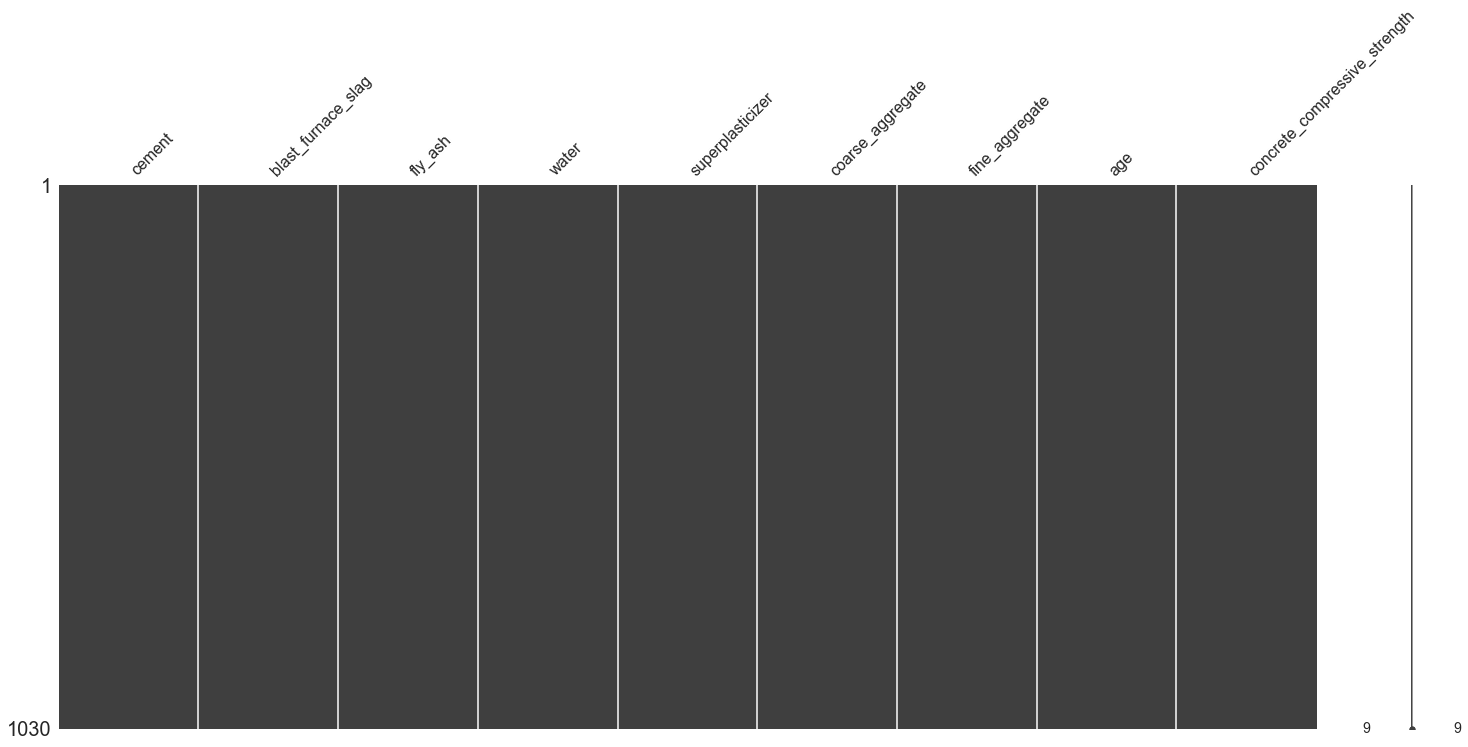

In [12]:
# descripción preeliminar del dataset
display(df.info())
display(msngo.matrix(df))
display(df.describe())

- Podemos apreciar que las variables son numéricas, que el dataset tiene 1030 registros y no contiene valores perdidos o nulos, hay variables con diferentes rangos de dispersión, visualmente podremos aclarar mejor.

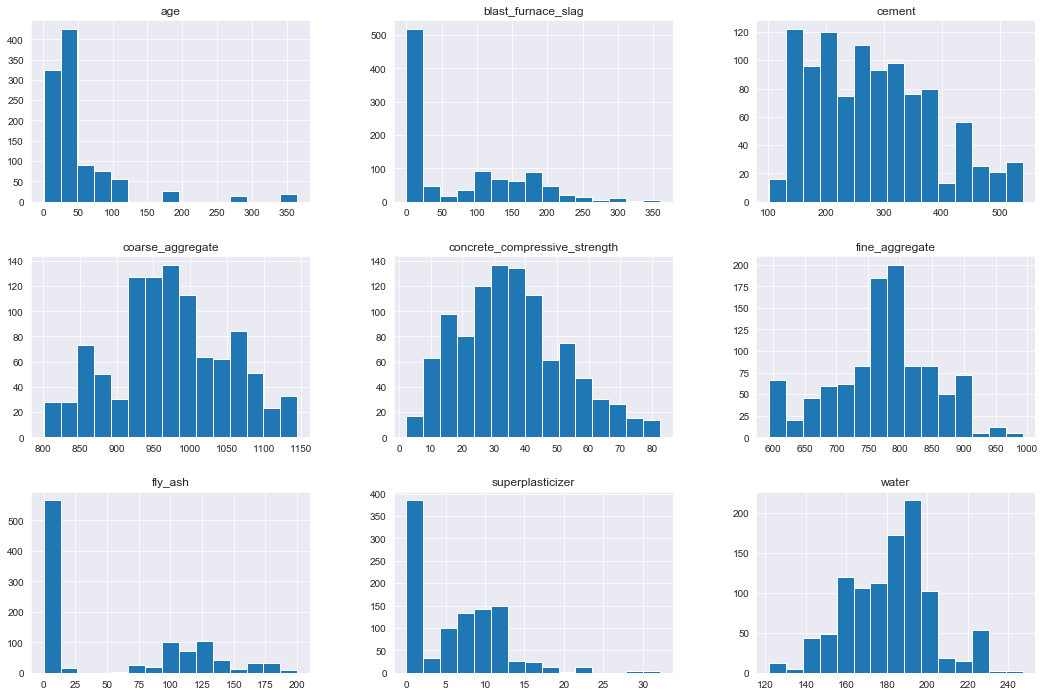

<Figure size 432x288 with 0 Axes>

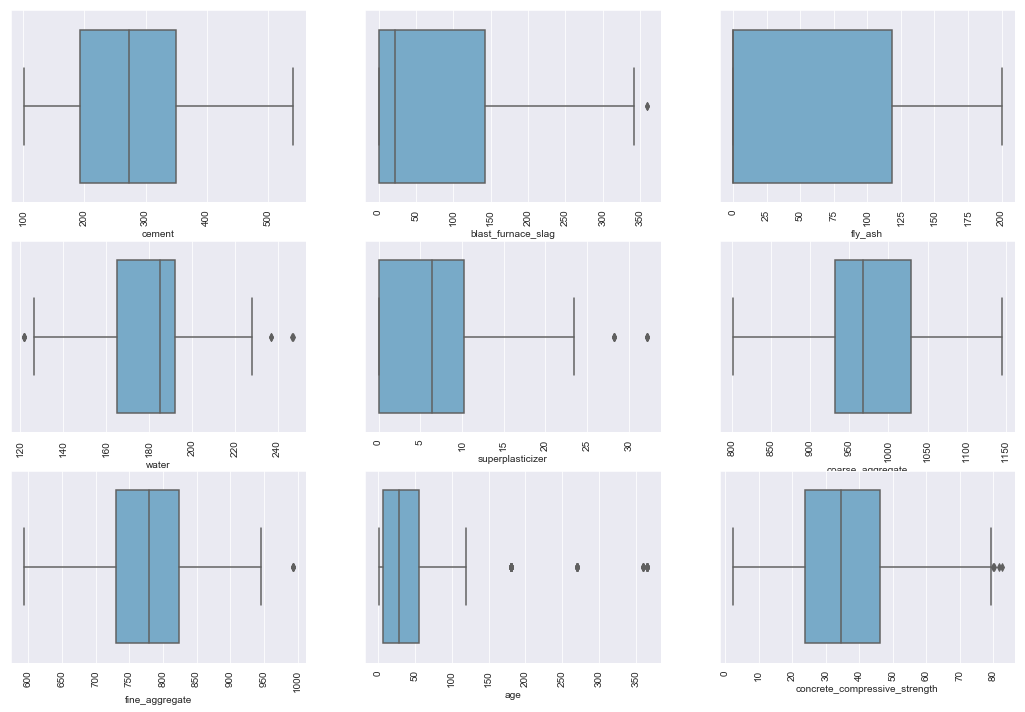

In [13]:
# Visualización de las variables mediante histogramas y boxplot
# Histogramas 
df.hist(bins=15, figsize=(18, 12), layout=(3, 3));

# Boxplots
plt.figure()
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.boxplot(x=df[variable], ax=subplot, palette="Blues", orient="h")
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

- Los histogramas muestran que las variables superplastice, water y fly_Ash se asemejan mucho a una distribución normal, el resto de las variables tienen comportamientos asimilables a una curva normal, pero con algunas desvíaciones considerables. 
- Los boxplot muestran que algunas variables presentan aglomeraciones de valores en los rangos iniciales, con algunos desviaciones hacia los valores mayor, asimismo se puede observar que la variable objetivo 'concrete_compressive_strenght' concentra sus valores ligeramente desplazados a la media, y la dispersión es relativamente homógenea, con algunos valores extremos hacia el rango mayor de la distribución.

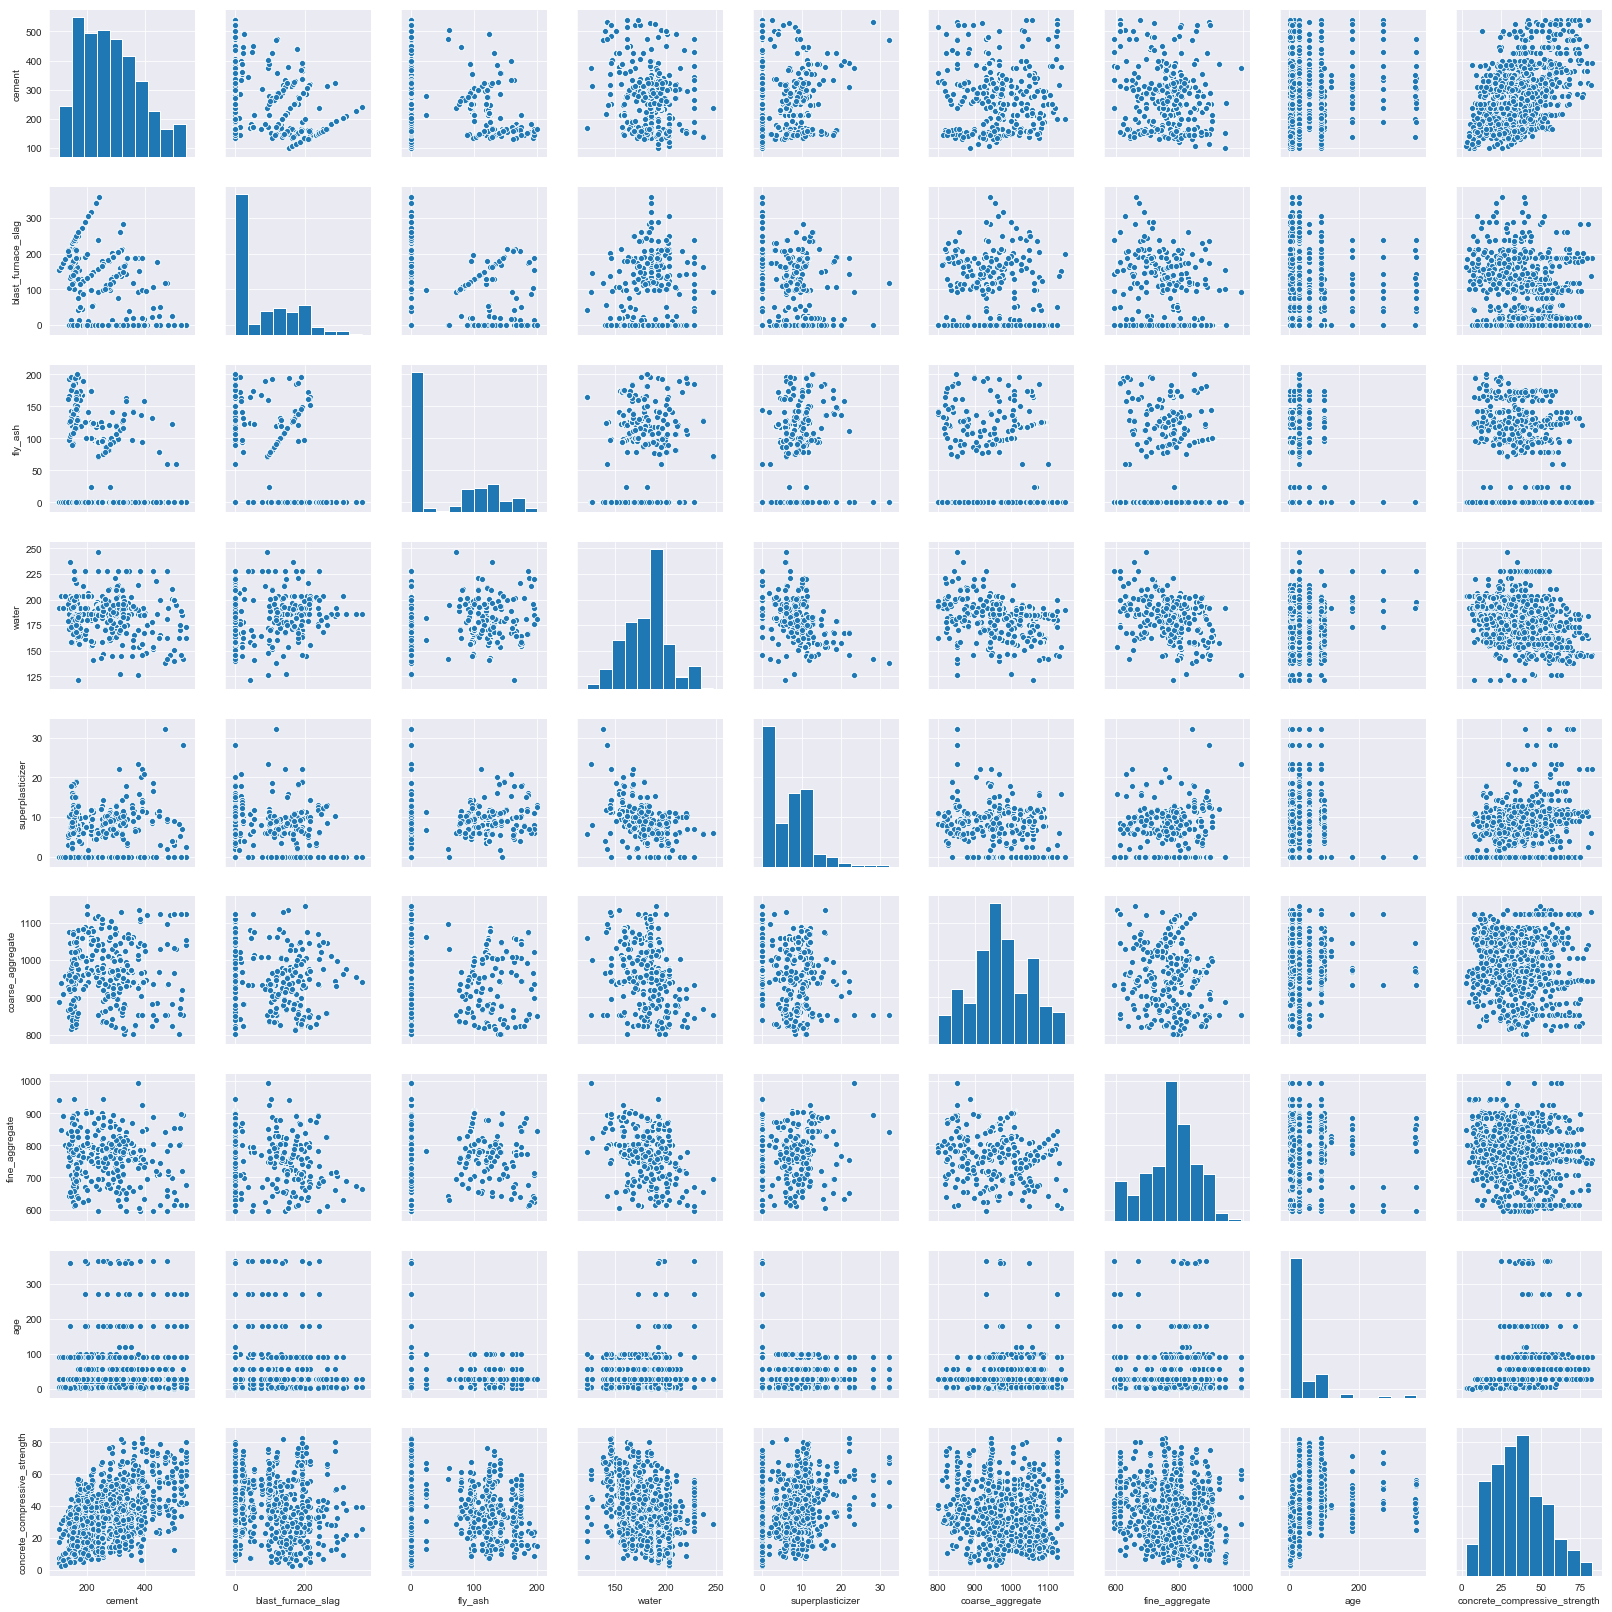

In [17]:
# ScatterPlot para visualizar correlaciones

sns.pairplot(df)

- El Scatterplot muestra las nubes de puntos e ilustra algunas tendencias lineales, aunque bastantes dispersas entre ciertas variables, para profundizar se aplicará un mapa de correlaciones y se analizarán las correlaciones más significativas sobre 0,5 (r2)

In [18]:
# correlaciones para observar si existe colinealidad entre los datos de la muestra

df.corr().style.background_gradient() 

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1,-0.275216,-0.397467,-0.0815867,0.0923862,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1,-0.32358,0.107252,0.0432704,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.32358,1,-0.256984,0.377503,-0.00996083,0.0791085,-0.154371,-0.105755
water,-0.0815867,0.107252,-0.256984,1,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.0923862,0.0432704,0.377503,-0.657533,1,-0.265999,0.222691,-0.1927,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.00996083,-0.182294,-0.265999,1,-0.178481,-0.00301588,-0.164935
fine_aggregate,-0.222718,-0.281603,0.0791085,-0.450661,0.222691,-0.178481,1,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.1927,-0.00301588,-0.156095,1,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1


- Se observa que las correlaciones más significativas se dan entre concrete_compressive_strength y cement (aprox. 0,5) y water-superplasticizer (-0,66), el resto de las correlaciones está por debajo de éstos valores y no son los suficiente fuerte, sin embargo para el caso de cement no debería presentar problemas de colinealidad ya que la relación no es superior al 0,8 y en el caso de water vs superplasticizer los sentidos de correlación son  contrarios.

In [19]:
# Correlación de la variable objetivo
df.corr()[['concrete_compressive_strength']].sort_values(by = 'concrete_compressive_strength',ascending = False)\
.style.background_gradient()

,concrete_compressive_strength
concrete_compressive_strength,1
cement,0.497832
superplasticizer,0.366079
age,0.328873
blast_furnace_slag,0.134829
fly_ash,-0.105755
coarse_aggregate,-0.164935
fine_aggregate,-0.167241
water,-0.289633


-Se aprecia que las variables cement, superplasticize, age y blast_furnace_slag se correlaciona positivamente con concrete_compressive_strength, el resto de las variables se correlacion de manera negativa, sin embargo las correlaciones en general son bajas, inferiores a 0,5 y en algunos casos es díficil determinar si son mero producto del azar (valores cercanos a 0.1)

In [31]:
# Función para definir normalidad  de una variable
def test_normal_distribution(dataframe, var):
    sns.distplot(dataframe[var], fit = norm);
    plt.figure()
    stats.probplot(dataframe[var], plot = plt)
    plt.figure()
    asimetria=dataframe[var].skew().round(3)
    if asimetria >= -0.6 and asimetria<= 0.6:
        print("El Coeficiente de asimetría tiene un valor de: ", asimetria," lo que significa la curva es simétrica y se aproxima a la normal")
    else:
        print("El coeficiente de asimetría es:", asimetria, " y no se ajusta  a una distribución normal")
    curtosis=dataframe[var].kurt().round(3)
    if curtosis >= -0.6 and curtosis<= 0.6:
        print("El Coeficiente de curtosis tiene un valor de: ", curtosis,"lo que significa la curva es mesocurtica y se aproxima a la normal")
    else:
        print("El coeficiente de curtosis es:",curtosis ," y no se ajusta  a una distribución normal")

cement
El Coeficiente de asimetría tiene un valor de:  0.509  lo que significa la curva es simétrica y se aproxima a la normal
El Coeficiente de curtosis tiene un valor de:  -0.521 lo que significa la curva es mesocurtica y se aproxima a la normal


-------------
blast_furnace_slag
El coeficiente de asimetría es: 0.801  y no se ajusta  a una distribución normal
El Coeficiente de curtosis tiene un valor de:  -0.508 lo que significa la curva es mesocurtica y se aproxima a la normal


-------------
fly_ash
El Coeficiente de asimetría tiene un valor de:  0.537  lo que significa la curva es simétrica y se aproxima a la normal
El coeficiente de curtosis es: -1.329  y no se ajusta  a una distribución normal


-------------
water
El Coeficiente de asimetría tiene un valor de:  0.075  lo que significa la curva es simétrica y se aproxima a la normal
El Coeficiente de curtosis tiene un valor de:  0.122 lo que significa la curva es mesocurtica y se aproxima a la normal


-------------
superplastic

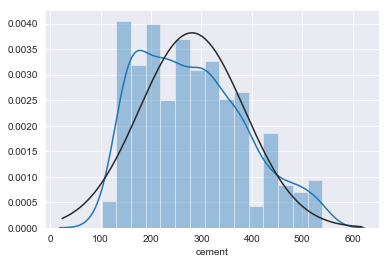

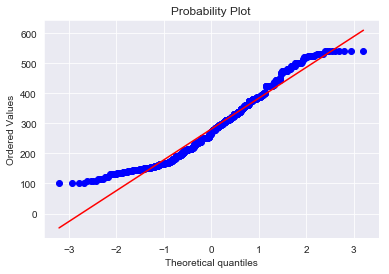

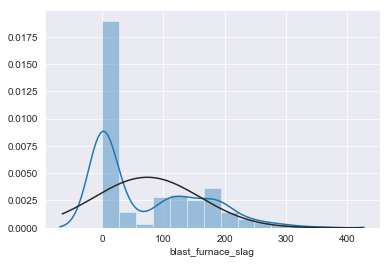

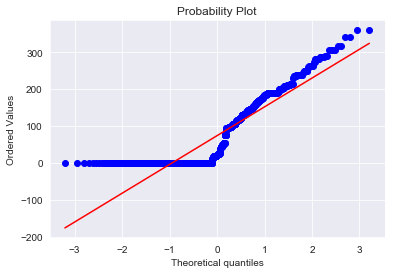

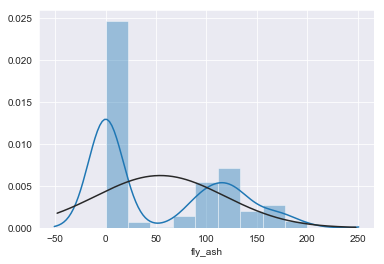

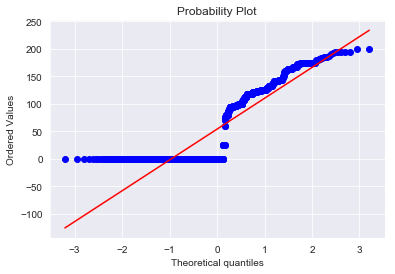

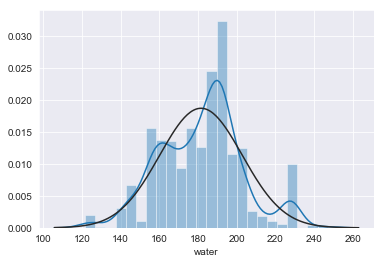

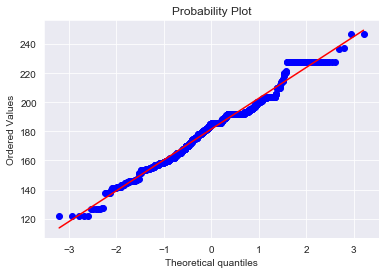

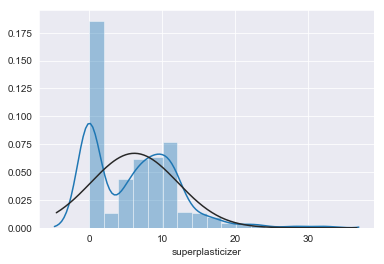

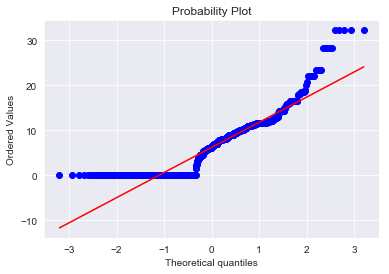

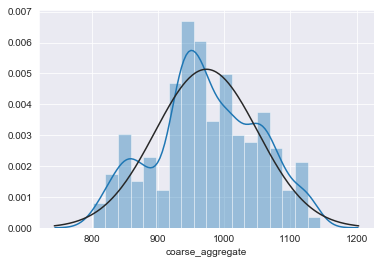

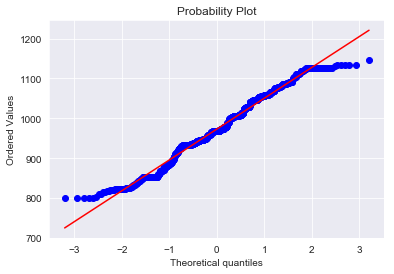

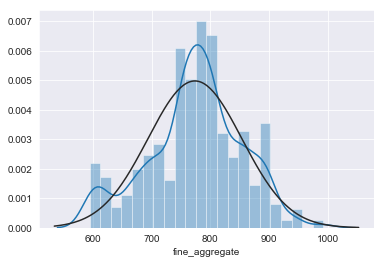

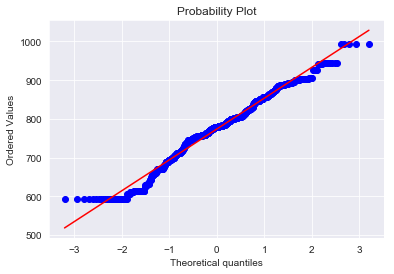

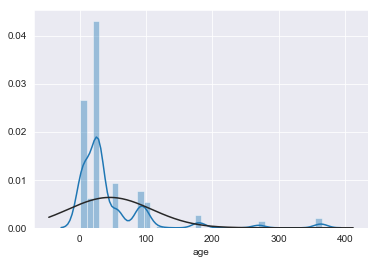

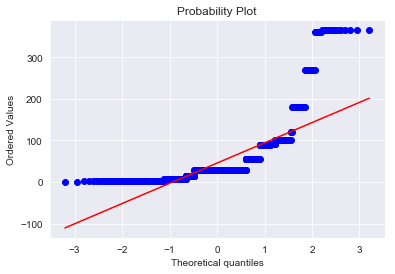

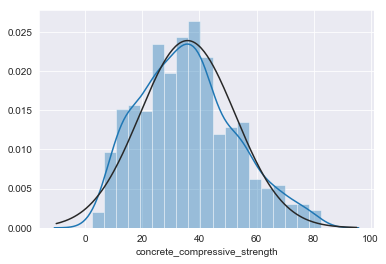

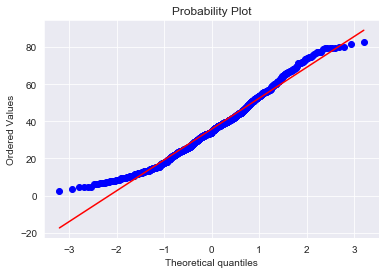

<Figure size 432x288 with 0 Axes>

In [28]:
#Pruebas de normalidad
variables_continuas = df.columns
for i in variables_continuas:
    print(i)
    test_normal_distribution(df,i)
    print('\n')
    print('-------------')

- Se puede apreciar que varias variables se comportan de manera aproximada a una distribución normal, algunas variables no se comportan de forma normal, pero nuestra variable objetivo 'concrete_compressive_strength', presenta un coeficiente de asimetría que define la curva como simétrica y un coeficiente de curtosis que significa que es mesocurtica. Los histogramas muestra que el comportamiento se asemeja a una distribución normal, por lo que no sera necesaria normalizar la variable.


### Ejercicio 3: Modelo
* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam. Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
* Genere un primer modelo sin implementar la función gridsearch. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

- Según el tipo de problema, que consiste en predecir una variable continua con comportamiento acorde con la distribución normal, el modelo lineal generalizado (LinearGAM) debería funcionar mejor que el modelo logístico generalizado(GLM), puesto que es un problema de regresión y no de clasificación ( a menos que se intenterá binarizar el vector objetivo, pero para ello se debería tenerse evidencia suficiente de un comportamiento discreto de la variable en ambos escenarios binarios de clasificación). El resto de modelos  GammaGAM, InvGaussGAM, PoissonGAM, no se consideran para el problema, debido a que la variable objetivo se ajusta a una distribución normal y no a una distribución de Poisson, por ejemplo.

In [75]:
# Escalamiento de las variables
df_scaled = df.copy(deep=True)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns = df.columns)

display(df_scaled.applymap(lambda x: round(x,3)).describe())

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.000008,-0.000057,0.000074,0.000044,0.000063,-0.000036,-0.000037,-0.000043,0.000008
std,1.000485,1.000542,1.000413,1.000462,1.000454,1.000534,1.000507,1.000540,1.000495
min,-1.715000,-0.857000,-0.847000,-2.800000,-1.039000,-2.212000,-2.241000,-0.707000,-2.006000
25%,-0.850250,-0.857000,-0.847000,-0.781000,-1.039000,-0.527000,-0.532000,-0.612000,-0.725250
50%,-0.079000,-0.602000,-0.847000,0.161000,0.033000,-0.063000,0.073500,-0.280000,-0.082500
75%,0.659000,0.800500,1.002000,0.489000,0.669000,0.727000,0.629000,0.164000,0.618000
max,2.478000,3.311000,2.281000,3.066000,4.354000,2.214000,2.733000,5.058000,2.802000


- Se aprecian las variables escaladas en un mismo rango para ser aplicadas al GAM

In [34]:
# Subconjunto de entrenamiento y test con las variables escaladas

var_atributos = [x for x in df.columns if x != 'concrete_compressive_strength']
var_objetivo = [x for x in df.columns if x == 'concrete_compressive_strength']

 
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    df_scaled.loc[:, var_atributos],
    df_scaled.loc[:, var_objetivo],
    test_size=.33,
    random_state=1986)

# Función que genera las métricas del modelo

def report_gam_metrics(model, X_test, y_test):
    #print('Métricas para modelo {0}:'.format(str(model)))
    print('----------------------------------------')     
    print('Test R^2 accuracy: {0}'.format(r2_score(y_test,
    model.predict(X_test)).round(3)))
    print('Test RMSE accuracy: {0}'.format(np.sqrt(mean_squared_error(y_test,
    model.predict(X_test))).round(3)))
    print('Test MAE accuracy: {0}'.format(median_absolute_error(y_test,
    model.predict(X_test)).round(3)))
    
    

In [35]:
# LinearGAM sin gridsearch
linear_gam = LinearGAM().fit(X_train_scaled, y_train_scaled)

In [42]:
# LinearGAM con gridsearch
search_params = {'lam': np.logspace(-3, 3, 11)}
linear_gam_grid = LinearGAM().gridsearch(X_train_scaled.values, y_train_scaled.values, **search_params)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


In [81]:
linear_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     79.6248
Link Function:                     IdentityLink Log Likelihood:                                 -2130.7769
Number of Samples:                          690 AIC:                                             4422.8033
                                                AICc:                                            4444.4379
                                                GCV:                                                0.1241
                                                Scale:                                              0.0986
                                                Pseudo R-Squared:                                   0.9145
Feature Function                  Lam

In [82]:
linear_gam_grid.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    104.4471
Link Function:                     IdentityLink Log Likelihood:                                 -2226.3233
Number of Samples:                          690 AIC:                                             4663.5408
                                                AICc:                                            4702.0104
                                                GCV:                                                0.1229
                                                Scale:                                                0.09
                                                Pseudo R-Squared:                                   0.9252
Feature Function                  Lam

- Podemos apreciar que ambos modelos son similares en su rendimiento, el pseudo r cuadrado de Mcfadden, que hay que interpretar con cautela puesto que no es una medida robusta de la correlación como el r cuadrado ajustado, tienen un desempeño alto superior a 0.9, siendo el modelo ajustado con gridsearch, ligeramente superior. En ambos modelos se emplearon cerca de 20 funciones (rank) para ajustar las variables y EDoF da cuenta de los grados de libertad para cada ajuste que se podrían intepretar como los "splines" o puntos de disgresión. En ambos modelos los p-values son significativos para los atributos y el principal cambio es en el lambda de penalización, para el caso sin grid éste corresponde a 0.6 y con grid 0.063, lo que implica una variación de un orden de magnitud, esta disminución en el lambda implica que el modelo con grid, tiene un desempeño un poco mejor, debido a que genera más splines en sus funciones, con lo que puede estimar mejor los parametros, pero si se siguiera minimizando las penalizaciones podría derivar en un error de overfitting.

In [43]:
# LinearGam métricas
report_gam_metrics(linear_gam, X_test_scaled, y_test_scaled)
report_gam_metrics(linear_gam_grid, X_test_scaled, y_test_scaled)

----------------------------------------
Test R^2 accuracy: 0.893
Test RMSE accuracy: 0.32
Test MAE accuracy: 0.209
----------------------------------------
Test R^2 accuracy: 0.898
Test RMSE accuracy: 0.313
Test MAE accuracy: 0.193


,LinerGAM sin GridSearch,LinerGAM con GridSearch
R2,0.893,0.898
RMSE,0.320,0.313
MAE,0.209,0.193


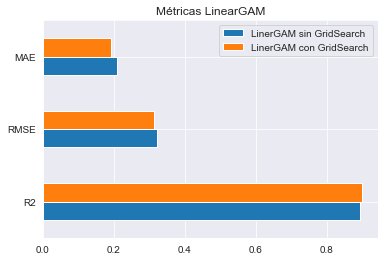

In [46]:
# Se comparan las métricas de cada modelo
data = { 'LinerGAM sin GridSearch': [r2_score(y_test_scaled,linear_gam.predict(X_test_scaled)).round(3), 
                                    np.sqrt(mean_squared_error(y_test_scaled,linear_gam.predict(X_test_scaled))).round(3),
                                    median_absolute_error(y_test_scaled,linear_gam.predict(X_test_scaled)).round(3)],
         'LinerGAM con GridSearch': [r2_score(y_test_scaled,linear_gam_grid.predict(X_test_scaled)).round(3), 
                                    np.sqrt(mean_squared_error(y_test_scaled,linear_gam_grid.predict(X_test_scaled))).round(3),
                                    median_absolute_error(y_test_scaled,linear_gam_grid.predict(X_test_scaled)).round(3)]
       }
errors_df = pd.DataFrame(data, index=['R2','RMSE','MAE'])
display(errors_df.head())
display(errors_df.plot(title='Métricas LinearGAM',kind='barh'))

- Al graficar el R cuadrado y los errores MSE y MAE, se aprecia que el modelo ajustado con Grid es ligeramente superior al modelo que no está ajustado con GRID.

### Ejercicio 4: Dependencia Parcial
* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

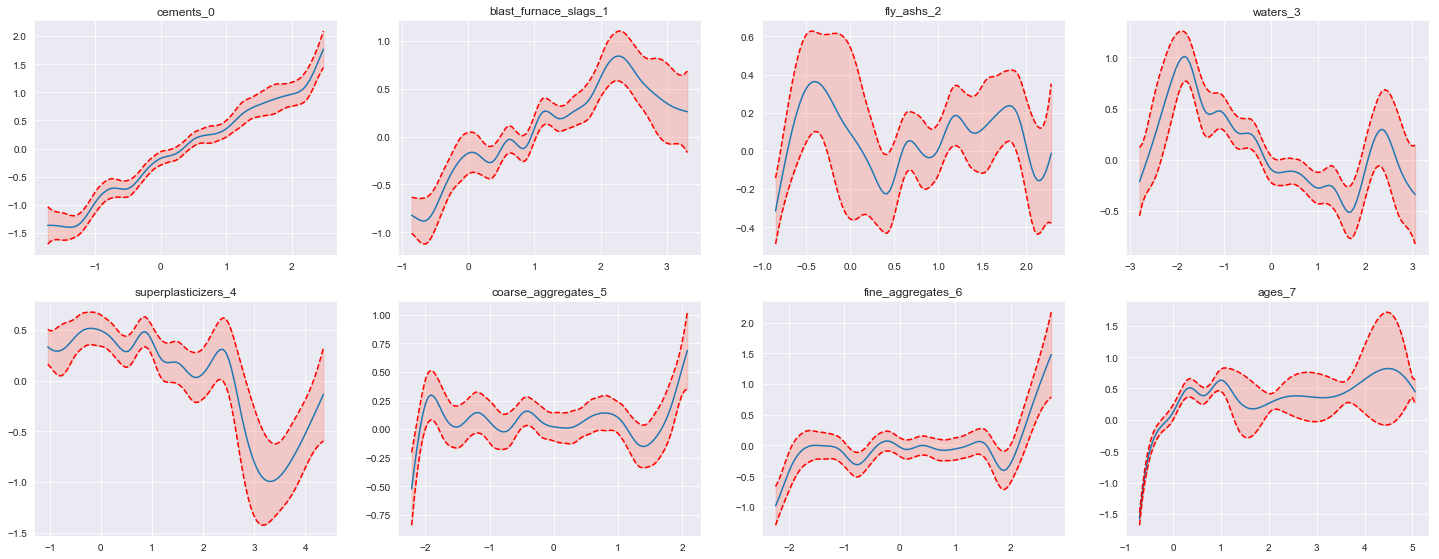

In [87]:
def partial_dependencys(model):
    titles=X_train_scaled.columns
    plt.figure(figsize=(25,25))
    for i, ax in enumerate(range(len(X_train_scaled.columns))):
        XX=model.generate_X_grid(term=i)
        pdep, confi=model.partial_dependence(term=i, width=.95)
        plt.subplot(5, 4, i+1)
        plt.plot(XX[:, i], pdep)
        plt.plot(XX[:, i], confi, c='r', ls='--')
        plt.fill_between(XX[:, i],confi[:, 0],confi[:, 1],color='tomato', alpha=.25)
        plt.title(titles[i] +"s_"+str(i)) 

        
partial_dependencys(linear_gam_grid)
        

- Las dependencias parciales muestran el comportamiento de las variables con sus funciones aproximadas, podemos que 'cement'  tiene una aproximación muy lineal con la variable objetivo 'concrete_compressive_strength' (en adelante ccs), es decir a medida que se incrementa cement se incrementa ccs.'blast_furnace_slag' aumenta de manera casí lineal hasta llegar a un valor umbral en el cuál desciende, 'fly_ash' presenta un comportamiento menos predecible y más ciclico con ccs, 'water' tiene un comportamiento aproximademente lineal y hace descender a ccs.'superplasticizer' se comporta aproximadamente como una  función exponencial negativa en que los valores descienden abruptamente después de cierto umbral.'coarse_aggregate' tiene más bien un efecto casí constante, salvo pequeñas variaciones y al final de la distribución un aumento exponencial, no se ve mayor injerencia en ccs.'fine_aggregate' tiene un efeco muy similar a'coarse_aggregate' con una pendiente menor, se mantiene oscilando casi constante y al final de la distribución presenta un incremento exponencial en ccs. Finalmente,'age' se comporta de manera muy similar a una función exponencial, con una curva pronunciada al comienzo y luego se vuelve constante.   